# Assignment 3: Non linear programming

### Clara Cabañas Pujadas, Emilie Krutnes Engen, Miguel Rodríguez Asensio & Juan Sebastián Salcedo

In [1]:
%matplotlib notebook
import numpy as np
import time

nsample = 1000
nvariables= 100
X0 = np.ones([nsample,1]) # the first column are ones for the beta_0
X1 = np.random.uniform(0,10,([nsample,nvariables]))
X = np.concatenate([X0, X1],axis=1)
beta=np.random.randint(-5,5,size=([nvariables+1,1]));beta
error=np.random.normal(0,1,(nsample,1)) # normal random error
Y=np.dot(X,beta)+error
# print(beta)

(<matplotlib.collections.PathCollection at 0x10ac79290>,
 <matplotlib.text.Text at 0x10a925710>)

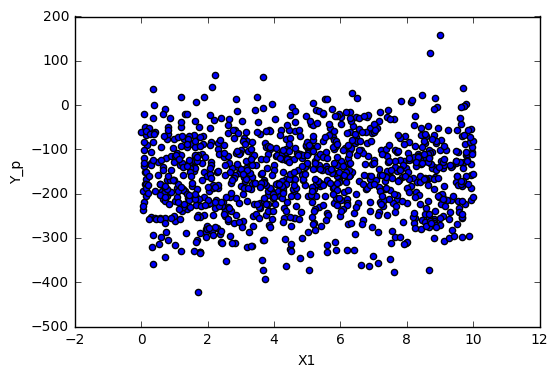

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
Y_p=np.array(Y) # convert to array for ploting
plt.scatter(X[:,1], Y_p),plt.xlabel('X1'),plt.ylabel('Y_p')

### Section a)

In [9]:
time_start = time.clock()
beta_ls_exact=np.dot(np.dot(np.linalg.inv(np.dot(np.transpose(X),X)),np.transpose(X)),Y)
time_elapsed = (time.clock() - time_start)

print '\nExecution time: {0:.4f}'.format(time_elapsed)
print 'Results: \n' + str(beta_ls_exact)


Execution time: 0.0109
Results: 
[[  1.81628742e+02]
 [  8.76430029e+00]
 [ -1.71078017e+00]
 [  2.94904891e+00]
 [  1.14605522e+01]
 [  9.13151492e-01]
 [  7.49680071e+00]
 [  6.48351759e+00]
 [ -5.40068308e+00]
 [  9.83690839e-01]
 [ -9.61184968e-01]
 [ -9.52073275e+00]
 [ -1.11506437e+00]
 [  5.67946026e+00]
 [ -7.19346011e+00]
 [  4.33160110e+00]
 [ -4.94022322e+00]
 [  9.22296548e+00]
 [ -4.06980354e+00]
 [ -4.83773137e+00]
 [ -5.62657476e-02]
 [ -7.33718484e+00]
 [  4.03368523e+00]
 [ -4.43423635e+00]
 [ -4.16083266e+00]
 [ -6.61392379e+00]
 [ -1.99474421e+00]
 [  2.82834663e+00]
 [ -3.79916705e+00]
 [ -2.89934628e-01]
 [  3.49126675e-01]
 [ -4.35134330e+00]
 [  9.63630757e+00]
 [  5.06203031e+00]
 [  2.92465101e-01]
 [  1.31594724e+00]
 [ -2.11403824e+00]
 [ -8.68895710e+00]
 [ -2.30648736e+00]
 [ -1.79583868e+00]
 [ -4.84361001e-01]
 [ -5.83087744e+00]
 [ -7.42786708e+00]
 [  8.96526953e-01]
 [ -1.08430812e+00]
 [ -6.03577244e+00]
 [  2.04660592e+00]
 [ -4.17389330e+00]
 [ -8.

### Section b)

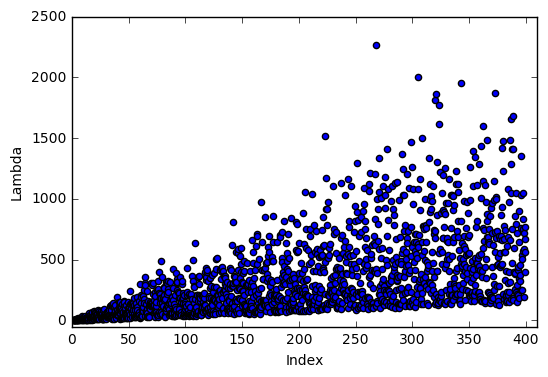

In [5]:
sigma = np.arange(1,400,0.25)
# sigma = range(1,10)

def lamb(beta_ls_exact, beta):
    return 100*(np.linalg.norm(beta_ls_exact-beta,ord=2)/np.linalg.norm(beta,ord=2))

vectorb = [] 
    
for s in sigma:
    beta=np.random.randint(-5,5,size=([nvariables+1,1]))
    error=np.random.normal(0,s,(nsample,1)) #normal random error
    Y=np.dot(X,beta)+error
    
    beta_ls_exact=np.dot(np.dot(np.linalg.inv(np.dot(np.transpose(X),X)),np.transpose(X)),Y)
    vectorb.append(lamb(beta_ls_exact, beta))

# print vectorb

%matplotlib inline
# plt.plot(np.matrix(sigma),np.matrix(vectorb))
# plt.plot(vectorb,'bs')
plt.scatter(sigma,vectorb)
plt.xlabel('Index'), plt.ylabel('Lambda')
plt.ylim((-50,2500))
plt.xlim((0,410))
plt.show()        

### Section c)

**1. Nelder-Mead**

In [26]:
from scipy.optimize import minimize

def least_sq_reg(beta_ls, X, Y):
    beta_ls=np.matrix(beta_ls)
    z=Y-X*np.transpose(beta_ls)
    return np.dot(np.transpose(z),z)

beta_ls0=np.zeros(nvariables+1)
time_start = time.clock()
res = minimize(least_sq_reg,beta_ls0,args=(X,Y),method='Nelder-Mead',options={'disp':True,'xtol':1e-10})
time_elapsed = (time.clock() - time_start)

In [30]:
print '\nExecution time for Least Squares Regression (Nelder-Mead): {0:.4f}'.format(time_elapsed)
print 'Objective function value: {0:.4f}'.format(res.fun)
print 'Number of iterations: {0}'.format(res.nit)
print 'Number of function evaluations: {0}'.format(res.nfev)
if 'njev' in res.keys():
    print 'Number of gradient evaluations: {0}'.format(res.njev)
else: 
    print 'Number of gradient evaluations: 0'
if 'nhev' in res.keys():
    print 'Number of hessian evaluations: {0}'.format(res.nhev)
else: 
    print 'Number of hessian evaluations: 0'
print 'Error = {0:.4f}'.format(np.linalg.norm(np.transpose(beta_ls_exact)-res.x,ord=2)/np.linalg.norm(np.transpose(beta_ls_exact),ord=2))
print 'Results: \n' + str(res.x) 


Execution time for Least Squares Regression (Nelder-Mead): 10.6978
Objective function value: 178735068.8500
Number of iterations: 19435
Number of function evaluations: 20200
Number of gradient evaluations: 0
Number of hessian evaluations: 0
Error = 0.9327
Results: 
[ 15.01580025   3.17456282  -1.30218645  -1.92691851   4.64527378
  -6.44453786  -0.727172     2.98178994  -0.74850018  -1.41731412
  -7.19436067  -1.30522048  -2.45869842   4.06392715  -2.63640773
   0.83816797 -12.71382741   6.80387995  -0.96373838   3.58818348
  -0.63120303  -1.60962678  -8.98874399   4.85058107   3.8082448
  -0.74551512  -2.44480658  -2.00975646   4.18748896  -1.55194449
   2.98789571   0.04109569  -0.23245368  -1.29708319  -2.85793777
  -1.55436716   9.87763734  -2.10564879  -1.47972036   6.74777637
   6.68036676   2.13235842  -0.22760597 -11.47387958  -2.80002756
   3.70003159  -1.13880744   1.51030536  -5.36383722   5.32639837
  -0.6592243   -0.40532375   1.50143831   1.28823713   3.23966955
  -1.037

**2. Powell**

In [38]:
time_start = time.clock()
res = minimize(least_sq_reg,beta_ls0,args=(X,Y),method='Powell',options={'disp':True,'xtol':1e-10})
time_elapsed = (time.clock() - time_start)

In [39]:
print '\nExecution time for Least Squares Regression (Powell): {0:.4f}'.format(time_elapsed)
print 'Objective function value: {0!s}'.format(res.fun)
print 'Number of iterations: {0}'.format(res.nit)
print 'Number of function evaluations: {0}'.format(res.nfev)
if 'njev' in res.keys():
    print 'Number of gradient evaluations: {0}'.format(res.njev)
else: 
    print 'Number of gradient evaluations: 0'
if 'nhev' in res.keys():
    print 'Number of hessian evaluations: {0}'.format(res.nhev)
else: 
    print 'Number of hessian evaluations: 0'
print 'Error = {0:.4f}'.format(np.linalg.norm(np.transpose(beta_ls_exact)-res.x,ord=2)/np.linalg.norm(np.transpose(beta_ls_exact),ord=2))
print 'Results: \n' + str(res.x) 


Execution time for Least Squares Regression (Powell): 91.9103
Objective function value: [[  1.48822209e+08]]
Number of iterations: 38
Number of function evaluations: 102828
Number of gradient evaluations: 0
Number of hessian evaluations: 0
Error = 2.2824
Results: 
[[ -2.52553539e+02   8.50618723e+00  -2.53067601e+00   1.99288654e+00
    1.16717655e+01   1.15626799e+00   7.09725605e+00   5.02961711e+00
   -6.02948924e+00   1.01593359e-01  -2.21639517e+00  -1.12549530e+01
   -2.66893526e+00   4.25959227e+00  -9.89743933e+00   2.35552160e+00
   -7.41782398e+00   8.44488253e+00  -5.60163129e+00  -5.63332558e+00
   -6.61301863e-01  -8.28132305e+00   2.86144798e+00  -4.68400604e+00
   -4.31479091e+00  -6.47916275e+00  -1.88973581e+00   3.66160833e+00
   -2.93246120e+00   3.62936249e-01   2.14497604e+00  -2.41157520e+00
    1.21303185e+01   7.80072197e+00   4.13747547e+00   3.27345295e+00
    5.24730486e-01  -6.17345081e+00  -1.37312295e+00  -8.36124903e-01
   -1.45708553e-01  -5.16648867e+0

**3. Conjugate Gradient**

In [14]:
time_start = time.clock()
res = minimize(least_sq_reg,beta_ls0,args=(X,Y),method='CG',options={'disp':True})
time_elapsed = (time.clock() - time_start)

         Current function value: 146709274.616268
         Iterations: 199
         Function evaluations: 50997
         Gradient evaluations: 495


In [37]:
print '\nExecution time for Least Squares Regression (Conjugate Gradient): {0:.4f}'.format(time_elapsed)
print 'Objective function value: {0!s}'.format(res.fun)
print 'Number of iterations: {0}'.format(res.nit)
print 'Number of function evaluations: {0}'.format(res.nfev)
if 'njev' in res.keys():
    print 'Number of gradient evaluations: {0}'.format(res.njev)
else: 
    print 'Number of gradient evaluations: 0'
if 'nhev' in res.keys():
    print 'Number of hessian evaluations: {0}'.format(res.nhev)
else: 
    print 'Number of hessian evaluations: 0'
print 'Error = {0:.4f}'.format(np.linalg.norm(np.transpose(beta_ls_exact)-res.x,ord=2)/np.linalg.norm(np.transpose(beta_ls_exact),ord=2))
print 'Results: \n' + str(res.x) 


Execution time for Least Squares Regression (Conjugate Gradient): 92.1855
Objective function value: [[  1.48822209e+08]]
Number of iterations: 38
Number of function evaluations: 102828
Number of gradient evaluations: 0
Number of hessian evaluations: 0
Error = 2.2824
Results: 
[[ -2.52553539e+02   8.50618723e+00  -2.53067601e+00   1.99288654e+00
    1.16717655e+01   1.15626799e+00   7.09725605e+00   5.02961711e+00
   -6.02948924e+00   1.01593359e-01  -2.21639517e+00  -1.12549530e+01
   -2.66893526e+00   4.25959227e+00  -9.89743933e+00   2.35552160e+00
   -7.41782398e+00   8.44488253e+00  -5.60163129e+00  -5.63332558e+00
   -6.61301863e-01  -8.28132305e+00   2.86144798e+00  -4.68400604e+00
   -4.31479091e+00  -6.47916275e+00  -1.88973581e+00   3.66160833e+00
   -2.93246120e+00   3.62936249e-01   2.14497604e+00  -2.41157520e+00
    1.21303185e+01   7.80072197e+00   4.13747547e+00   3.27345295e+00
    5.24730486e-01  -6.17345081e+00  -1.37312295e+00  -8.36124903e-01
   -1.45708553e-01  -5

**4. Newton-CG**

In [40]:
def least_sq_reg_der(beta_ls,X,Y):
    beta_ls=np.matrix(beta_ls)
    pp=-2*np.dot(np.transpose(Y-np.dot(X,np.transpose(beta_ls))),X)
    return np.squeeze(np.asarray(pp))
    
def least_sq_reg_hess(beta_ls,X,Y):
    return 2*np.dot(np.transpose(X),X)

time_start = time.clock()                   
res = minimize(least_sq_reg,beta_ls0,args=(X,Y),method='Newton-CG',jac=least_sq_reg_der,hess=least_sq_reg_hess,options={'disp':True})
time_elapsed = (time.clock() - time_start) 

Optimization terminated successfully.
         Current function value: 146690768.414897
         Iterations: 14
         Function evaluations: 16
         Gradient evaluations: 29
         Hessian evaluations: 14


In [42]:
print '\nExecution time for Least Squares Regression (Newton-CG): {0:.4f}'.format(time_elapsed)
print 'Objective function value: {0!s}'.format(res.fun)
print 'Number of iterations: {0}'.format(res.nit)
print 'Number of function evaluations: {0}'.format(res.nfev)
if 'njev' in res.keys():
    print 'Number of gradient evaluations: {0}'.format(res.njev)
else: 
    print 'Number of gradient evaluations: 0'
if 'nhev' in res.keys():
    print 'Number of hessian evaluations: {0}'.format(res.nhev)
else: 
    print 'Number of hessian evaluations: 0'
np.linalg.inv(least_sq_reg_hess(res.x,X,Y))
print 'Error = ' + str(np.linalg.norm(np.transpose(beta_ls_exact)-res.x,ord=2)/np.linalg.norm(np.transpose(beta_ls_exact),ord=2))
print 'Results: \n' + str(res.x) 


Execution time for Least Squares Regression (Newton-CG): 0.0682
Objective function value: 146690768.415
Number of iterations: 14
Number of function evaluations: 16
Number of gradient evaluations: 29
Number of hessian evaluations: 14
Error = 0.0000
Results: 
[  1.81627277e+02   8.76430032e+00  -1.71076868e+00   2.94904995e+00
   1.14605524e+01   9.13159415e-01   7.49681105e+00   6.48353284e+00
  -5.40068096e+00   9.83705399e-01  -9.61180648e-01  -9.52073135e+00
  -1.11506256e+00   5.67947031e+00  -7.19346334e+00   4.33161266e+00
  -4.94022560e+00   9.22295520e+00  -4.06978917e+00  -4.83774436e+00
  -5.62576636e-02  -7.33717722e+00   4.03369297e+00  -4.43422362e+00
  -4.16082455e+00  -6.61393556e+00  -1.99473798e+00   2.82834962e+00
  -3.79916701e+00  -2.89924910e-01   3.49135107e-01  -4.35134617e+00
   9.63629170e+00   5.06203815e+00   2.92471037e-01   1.31595438e+00
  -2.11403954e+00  -8.68895593e+00  -2.30648284e+00  -1.79582695e+00
  -4.84365282e-01  -5.83087845e+00  -7.42786985e+00

### Section d)

**i. Gradient method**

In [51]:
# Gradient method

(a,b)=X.shape
beta_lsg=np.zeros(b) # initial value for beta
alpha=0.00005
n_iter=100000 # maximum number iteration
OF_iter=np.zeros(n_iter)
tol_iter=np.zeros(n_iter)
alpha_iter=np.zeros(n_iter)
i=0;
tol=1000;
epsilon=1e-4;

time_start = time.clock()
while (i <= n_iter-2) and (tol>epsilon):
    i=i+1
    grad=least_sq_reg_der(beta_lsg,X,Y)
    ddirect=-grad
    #######################
    # Armijo Rule
    sigma=0.1
    beta=0.5
    alpha=1
    while (least_sq_reg(beta_lsg+alpha*ddirect, X, Y)> least_sq_reg(beta_lsg,X,Y)+alpha*sigma*np.dot(grad,ddirect)):
        alpha=alpha*beta
    #######################    
    beta_lsg=beta_lsg+alpha*ddirect
    OF_iter[i]=least_sq_reg(beta_lsg,X,Y)
    tol=np.linalg.norm(grad,ord=2)
    tol_iter[i]=tol

time_elapsed = (time.clock() - time_start) 

In [52]:
print '\nExecution time for Gradient method: {0:.4f}'.format(time_elapsed)
print 'Objective function value: {0!s}'.format(OF_iter[i])
print 'Number of iterations: {0}'.format(i)
print 'Number of function evaluations: {0}'.format(i)
print 'Number of gradient evaluations: {0}'.format(i)
print 'Number of hessian evaluations: 0'
print 'Tolerance = ' + str(tol)
print 'Error = ' + str(np.linalg.norm(np.transpose(beta_ls_exact)-res.x,ord=2)/np.linalg.norm(np.transpose(beta_ls_exact),ord=2))
print 'Results: \n' + str(beta_lsg)
# print 'Exact values: \n' + str(np.transpose(beta_ls_exact))


Execution time for Gradient method: 1061.7627
Objective function value: 146730431.059
Number of iterations: 99999
Number of function evaluations: 99999
Number of gradient evaluations: 99999
Number of hessian evaluations: 0
Tolerance = 815.184028596
Error = 7.70868397643e-06
Results: 
[  6.33835768e+01   9.03965717e+00  -1.52751949e+00   3.10724318e+00
   1.16336995e+01   1.20117096e+00   7.77302797e+00   6.55539877e+00
  -5.17568064e+00   1.29816211e+00  -6.09664952e-01  -9.15461011e+00
  -1.03900590e+00   6.04057789e+00  -6.98018171e+00   4.60110830e+00
  -4.65767743e+00   9.48512153e+00  -3.88388685e+00  -4.63559890e+00
   2.41342106e-01  -6.96938468e+00   4.19276458e+00  -4.16673314e+00
  -3.83535291e+00  -6.54983694e+00  -1.71807009e+00   3.12398573e+00
  -3.59558896e+00  -1.83799556e-02   6.38804352e-01  -4.14248919e+00
   9.87175099e+00   5.23005746e+00   7.56618308e-01   1.58481683e+00
  -1.93230701e+00  -8.30313330e+00  -2.17702411e+00  -1.49442042e+00
  -2.69198981e-01  -5.70

**ii. Newtons method**

In [53]:
# Newton's Method

(a,b)=X.shape
beta_lsn=np.zeros(b) # initial value for beta
alpha=0.00005
n_iter=100000 # maximum nunber iteration
OF_iter=np.zeros(n_iter)
tol_iter=np.zeros(n_iter)
alpha_iter=np.zeros(n_iter)
i=0;
tol=1000;
epsilon=1e-4;

time_start = time.clock()
while (i <= n_iter-2) and (tol>epsilon):
    i=i+1
    grad=least_sq_reg_der(beta_lsn,X,Y)
    hess=least_sq_reg_hess(beta_lsn,X,Y)
    ddirect=-(np.dot(np.linalg.inv(hess),grad)) #Definition of the descendent direction 
    #######################
    # Armijo Rule
    sigma=0.1
    beta=0.5
    alpha=1
    while (least_sq_reg(beta_lsn+alpha*ddirect, X, Y)> least_sq_reg(beta_lsn,X,Y)+alpha*sigma*np.dot(grad,ddirect)):
        alpha=alpha*beta
    #######################    
    beta_lsn=beta_lsn+alpha*ddirect
    OF_iter[i]=least_sq_reg(beta_lsn,X,Y)
    tol=np.linalg.norm(grad,ord=2)
    tol_iter[i]=tol

time_elapsed = (time.clock() - time_start) 

In [54]:
print '\nExecution time for Newtons method: {0:.4f}'.format(time_elapsed)
print 'Objective function value: {0!s}'.format(OF_iter[i])
print 'Number of iterations: {0}'.format(i)
print 'Number of function evaluations: {0}'.format(i)
print 'Number of gradient evaluations: {0}'.format(i)
print 'Number of hessian evaluations: {0}'.format(i)
print 'Tolerance = ' + str(tol)
print 'Error = ' + str(np.linalg.norm(np.transpose(beta_ls_exact)-beta_lsn,ord=2)/np.linalg.norm(beta_lsn,ord=2))
print 'Results: \n' + str(beta_lsn)
# print 'Exact values: \n' + str(np.transpose(beta_ls_exact))


Execution time for Newtons method: 0.0172
Objective function value: 146690768.415
Number of iterations: 2
Number of function evaluations: 2
Number of gradient evaluations: 2
Number of hessian evaluations: 2
Tolerance = 8.0257548536e-07
Error = 1.85531285769e-13
Results: 
[  1.81628742e+02   8.76430029e+00  -1.71078017e+00   2.94904891e+00
   1.14605522e+01   9.13151492e-01   7.49680071e+00   6.48351759e+00
  -5.40068308e+00   9.83690839e-01  -9.61184968e-01  -9.52073275e+00
  -1.11506437e+00   5.67946026e+00  -7.19346011e+00   4.33160110e+00
  -4.94022322e+00   9.22296548e+00  -4.06980354e+00  -4.83773137e+00
  -5.62657476e-02  -7.33718484e+00   4.03368523e+00  -4.43423635e+00
  -4.16083266e+00  -6.61392379e+00  -1.99474421e+00   2.82834663e+00
  -3.79916705e+00  -2.89934628e-01   3.49126675e-01  -4.35134330e+00
   9.63630757e+00   5.06203031e+00   2.92465101e-01   1.31594724e+00
  -2.11403824e+00  -8.68895710e+00  -2.30648736e+00  -1.79583868e+00
  -4.84361001e-01  -5.83087744e+00  -

**iii. Quasi-Newton method**

In [55]:
# Quasi-Newton's Method

(a,b)=X.shape
beta_lsqn = np.zeros(b) # initial value for beta
# beta_lsqn_minus = np.zeros(b) # initial value for beta
alpha = 0.00005
n_iter = 100000 # maximum nunber iteration
OF_iter=np.zeros(n_iter)
tol_iter=np.zeros(n_iter)
alpha_iter=np.zeros(n_iter)
i=0;
tol=1000;
epsilon=1e-4;
# B_kminus = np.zeros(nvariables,nvariables)

time_start = time.clock()
while (i <= n_iter-2) and (tol>epsilon):
    i=i+1
    grad = least_sq_reg_der(beta_lsqn,X,Y)
    if i==1:
        B=least_sq_reg_hess(beta_lsqn,X,Y)
    else:
        grad_minus = grad
        grad = least_sq_reg_der(beta_lsqn,X,Y)
        s = beta_lsqn - beta_lsqn_minus
        y = grad - grad_minus
        B = B + np.dot(y-np.dot(B,s),np.transpose(y-np.dot(B,s)))/(np.dot(np.transpose(y-np.dot(B,s)),s))  
    ddirect=-(np.dot(np.linalg.inv(B),grad)) #Definition of the descendent direction 
    #######################
    # Armijo Rule
    sigma=0.1
    beta=0.5
    alpha=1
    while (least_sq_reg(beta_lsqn+alpha*ddirect, X, Y)> least_sq_reg(beta_lsqn,X,Y)+alpha*sigma*np.dot(grad,ddirect)):
        alpha=alpha*beta
    #######################
    beta_lsqn_minus = beta_lsqn
    beta_lsqn = beta_lsqn_minus+alpha*ddirect
    OF_iter[i]=least_sq_reg(beta_lsqn,X,Y)
    tol=np.linalg.norm(grad,ord=2)
    tol_iter[i]=tol

time_elapsed = (time.clock() - time_start) 

In [56]:
print '\nExecution time for Quasi-Newton method: {0:.4f}'.format(time_elapsed)
print 'Objective function value: {0!s}'.format(OF_iter[i])
print 'Number of iterations: {0}'.format(i)
print 'Number of function evaluations: {0}'.format(i)
print 'Number of gradient evaluations: {0}'.format(i)
print 'Number of hessian evaluations: {0}'.format(i)
print 'Tolerance = ' + str(tol)
print 'Error = ' + str(np.linalg.norm(np.transpose(beta_ls_exact)-beta_lsqn,ord=2)/np.linalg.norm(beta_lsqn,ord=2))
print 'Results: \n' + str(beta_lsqn)
# print 'Exact values: \n' + str(np.transpose(beta_ls_exact))


Execution time for Quasi-Newton method: 0.0118
Objective function value: 146690768.415
Number of iterations: 2
Number of function evaluations: 2
Number of gradient evaluations: 2
Number of hessian evaluations: 2
Tolerance = 8.0257548536e-07
Error = 8.72504016536e-14
Results: 
[  1.81628742e+02   8.76430029e+00  -1.71078017e+00   2.94904891e+00
   1.14605522e+01   9.13151492e-01   7.49680071e+00   6.48351759e+00
  -5.40068308e+00   9.83690839e-01  -9.61184968e-01  -9.52073275e+00
  -1.11506437e+00   5.67946026e+00  -7.19346011e+00   4.33160110e+00
  -4.94022322e+00   9.22296548e+00  -4.06980354e+00  -4.83773137e+00
  -5.62657476e-02  -7.33718484e+00   4.03368523e+00  -4.43423635e+00
  -4.16083266e+00  -6.61392379e+00  -1.99474421e+00   2.82834663e+00
  -3.79916705e+00  -2.89934628e-01   3.49126675e-01  -4.35134330e+00
   9.63630757e+00   5.06203031e+00   2.92465101e-01   1.31594724e+00
  -2.11403824e+00  -8.68895710e+00  -2.30648736e+00  -1.79583868e+00
  -4.84361001e-01  -5.83087744e+

### Section e)

**Coordinate Gradient method**

In [57]:
# Coordinate Gradient method

(a,b)=X.shape
beta_cgm=np.zeros(b) # initial value for beta
alpha=0.00005
n_iter=100000 # maximum number iteration
OF_iter=np.zeros(n_iter)
tol_iter=np.zeros(n_iter)
alpha_iter=np.zeros(n_iter)
i=0;
tol=1000;
epsilon=1e-3;

time_start = time.clock()

while (i<=n_iter-2) and (tol>epsilon):
    i=i+1
    index = int(round(np.random.uniform(0,b-1)))
    grad=least_sq_reg_der(beta_cgm,X,Y) # the gradient
    grad_i = grad[index] # the i-th coordinate of the gradient
    e_i=np.zeros(b)
    e_i[index] = 1 # the canonical coordinate vector
    ddirect=-grad_i*e_i
    #######################
    # Armijo Rule
    sigma=0.1
    beta=0.5
    alpha=1
    while (least_sq_reg(beta_cgm+alpha*ddirect, X, Y)> least_sq_reg(beta_cgm,X,Y)+alpha*sigma*np.dot(grad,ddirect)):
        alpha=alpha*beta
    ####################### 
    beta_cgm=beta_cgm+alpha*ddirect
    OF_iter[i]=least_sq_reg(beta_cgm,X,Y)
    tol=np.linalg.norm(grad,ord=2)
    tol_iter[i]=tol

time_elapsed = (time.clock() - time_start) 

In [58]:
print '\nExecution time for Coordinate Gradient method: {0:.4f}'.format(time_elapsed)
print 'Objective function value: {0!s}'.format(OF_iter[i])
print 'Number of iterations: {0}'.format(i)
print 'Number of function evaluations: {0}'.format(i)
print 'Number of gradient evaluations: {0}'.format(i)
print 'Number of hessian evaluations: 0'
print 'Tolerance = ' + str(tol)
print 'Error = ' + str(np.linalg.norm(np.transpose(beta_ls_exact)-beta_cgm,ord=2)/np.linalg.norm(beta_cgm,ord=2))
print 'Results: \n' + str(beta_cgm)
# print 'Exact values: \n' + str(np.transpose(beta_ls_exact))


Execution time for Coordinate Gradient method: 800.9918
Objective function value: 146696785.615
Number of iterations: 99999
Number of function evaluations: 99999
Number of gradient evaluations: 99999
Number of hessian evaluations: 0
Tolerance = 285.019233955
Error = 0.313302627188
Results: 
[  1.35573932e+02   8.87102941e+00  -1.64001285e+00   3.01188681e+00
   1.15282542e+01   1.02427326e+00   7.60481910e+00   6.51094713e+00
  -5.31302541e+00   1.10560217e+00  -8.23386199e-01  -9.37764918e+00
  -1.08596303e+00   5.82120398e+00  -7.11021533e+00   4.43612167e+00
  -4.83019324e+00   9.32470420e+00  -3.99772729e+00  -4.75858292e+00
   5.56573059e-02  -7.19332103e+00   4.09633458e+00  -4.32967369e+00
  -4.03348193e+00  -6.58896601e+00  -1.88951367e+00   2.94384039e+00
  -3.71949512e+00  -1.84468550e-01   4.61773545e-01  -4.26983632e+00
   9.72601142e+00   5.12864255e+00   4.75546529e-01   1.42056471e+00
  -2.04327972e+00  -8.53781356e+00  -2.25559085e+00  -1.67776027e+00
  -4.00236492e-01

**Stochastic Gradient method**

In [59]:
# definition of partial gradient 
def least_sq_reg_der_par(beta_ls,X,Y,j):
    beta_ls=np.matrix(beta_ls)
    pp=-2*(Y[j]-X[j,]*np.transpose(beta_ls))*X[j,]
    return np.squeeze(np.asarray(pp))

In [60]:
# Stochastic Gradient method

(a,b)=X.shape
beta_lssto=np.zeros(b) # initial value for beta
n_iter=100000 # maximum nunber iteration
OF_iter=np.zeros(n_iter)
tol_iter=np.zeros(n_iter)
alpha_iter=np.zeros(n_iter)
i=0;
tol=1000;
epsilon=1e-4;

time_start = time.clock()
while (i <= n_iter-2) and (tol>epsilon):
    i=i+1
    j = np.random.randint(0, b-1)
    grad_par = least_sq_reg_der_par(beta_lssto,X,Y,j)
    grad = least_sq_reg_der(beta_lssto,X,Y)
    ddirect = - grad_par
    ###################################
    # Armijo Rule
    sigma = 0.1
    beta_half = 0.5
    alpha = 1
    while (least_sq_reg(beta_lssto + alpha*ddirect , X, Y)> least_sq_reg(beta_lssto, X, Y) + alpha*sigma*np.dot(grad,ddirect)):
           alpha = alpha*beta_half
    ###################################
    beta_lssto = beta_lssto + ddirect*alpha
    OF_iter[i] = least_sq_reg(beta_lssto, X, Y)
    tol = np.linalg.norm(grad,ord=2)
    tol_iter[i] = tol
    alpha_iter[i] = alpha

time_elapsed = (time.clock() - time_start) 

In [61]:
print '\nExecution time for Quasi-Newton method: {0:.4f}'.format(time_elapsed)
print 'Objective function value: {0!s}'.format(OF_iter[i])
print 'Number of iterations: {0}'.format(i)
print 'Number of function evaluations: {0}'.format(i)
print 'Number of gradient evaluations: {0}'.format(i)
print 'Number of hessian evaluations: 0'
print 'Tolerance = ' + str(tol)
print 'Error = ' + str(np.linalg.norm(np.transpose(beta_ls_exact)-beta_lssto,ord=2)/np.linalg.norm(beta_lssto,ord=2))
print 'Results: \n' + str(beta_lssto)
# print 'Exact values: \n' + str(np.transpose(beta_ls_exact))


Execution time for Quasi-Newton method: 2047.9468
Objective function value: 159326828.714
Number of iterations: 99999
Number of function evaluations: 99999
Number of gradient evaluations: 99999
Number of hessian evaluations: 0
Tolerance = 619309.053671
Error = 5.7799964169
Results: 
[-0.07301449  4.01802756 -5.60328779  2.24214081  3.90947766  1.3985639
  2.89679621  2.27317536  2.95370114  3.19877208 -1.19037617 -2.38756542
 -3.00597328  3.87965456  0.25105779 -3.19564994 -2.61367186  0.74638924
 -3.01830372 -1.04470902 -0.26776944  2.51191104  3.47250229 -4.45611171
 -6.34055298 -6.39886142  0.42243996 -3.30968515 -0.84824209 -1.41996155
 -3.89852543 -0.59941696  6.89151162  2.17319858  1.9079643   0.1164745
  2.70886843 -3.41978971 -3.16814232 -6.04539613 -3.91221223 -2.50448582
 -2.75928637  2.9823478  -0.38661468 -3.65118185  0.94300378  1.71601208
 -3.65116704 -2.91958427 -0.51184614 -1.99539838 -2.01689872  2.88026866
 -1.55424203  3.09766946 -3.14861834 -3.44030507  4.76395726